# **Titanic Dataset - Comprehensive Exploratory Data Analysis**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [45]:
# Set plotting style
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [46]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Titanic Celebal/train.csv')

**BASIC DATASET OVERVIEW**

In [47]:
print(f"Dataset Shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Dataset Shape: (891, 12)
Number of rows: 891
Number of columns: 12


In [48]:
print("\nColumn Names and Data Types:")
print(df.dtypes)

print("\nFirst 5 rows:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())


Column Names and Data Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  3

**DATA QUALITY ASSESSMENT**

In [49]:
print("Missing Values Analysis:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])

Missing Values Analysis:
          Missing Count  Missing Percentage
Cabin               687           77.104377
Age                 177           19.865320
Embarked              2            0.224467


In [50]:
# Numerical variables summary
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical Variables Summary:")
print(df[numerical_cols].describe())

Numerical Variables Summary:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [51]:
# Categorical variables summary
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Variables Summary:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Most frequent: {df[col].mode().iloc[0] if not df[col].mode().empty else 'N/A'}")
    if df[col].nunique() <= 10:
        print(f"  Value counts:\n{df[col].value_counts()}")


Categorical Variables Summary:

Name:
  Unique values: 891
  Most frequent: Abbing, Mr. Anthony

Sex:
  Unique values: 2
  Most frequent: male
  Value counts:
Sex
male      577
female    314
Name: count, dtype: int64

Ticket:
  Unique values: 681
  Most frequent: 1601

Cabin:
  Unique values: 147
  Most frequent: B96 B98

Embarked:
  Unique values: 3
  Most frequent: S
  Value counts:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


**VISUALIZATIONS**

In [15]:
# Create a comprehensive visualization dashboard
fig = plt.figure(figsize=(20, 25))

<Figure size 2000x2500 with 0 Axes>

Text(0.5, 1.0, 'Survival Distribution')

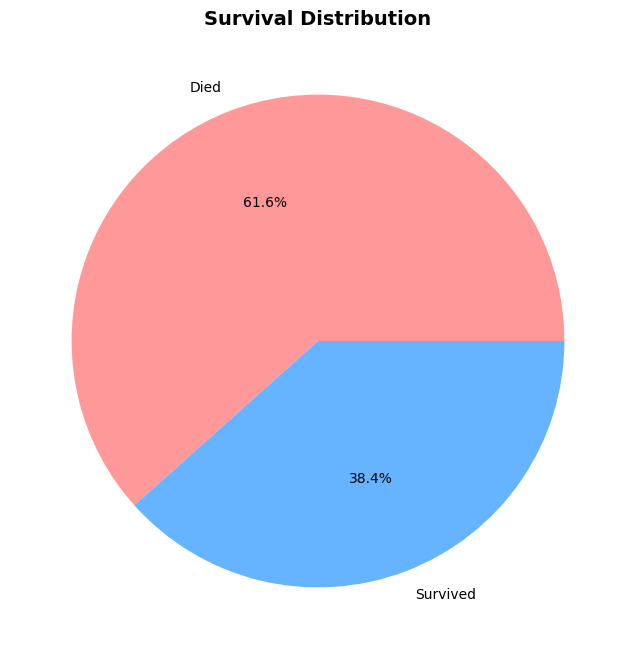

In [52]:
#Survival Distribution
plt.subplot(1, 1, 1)
survival_counts = df['Survived'].value_counts()
plt.pie(survival_counts.values, labels=['Died', 'Survived'], autopct='%1.1f%%',
        colors=['#ff9999', '#66b3ff'])
plt.title('Survival Distribution', fontsize=14, fontweight='bold')

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

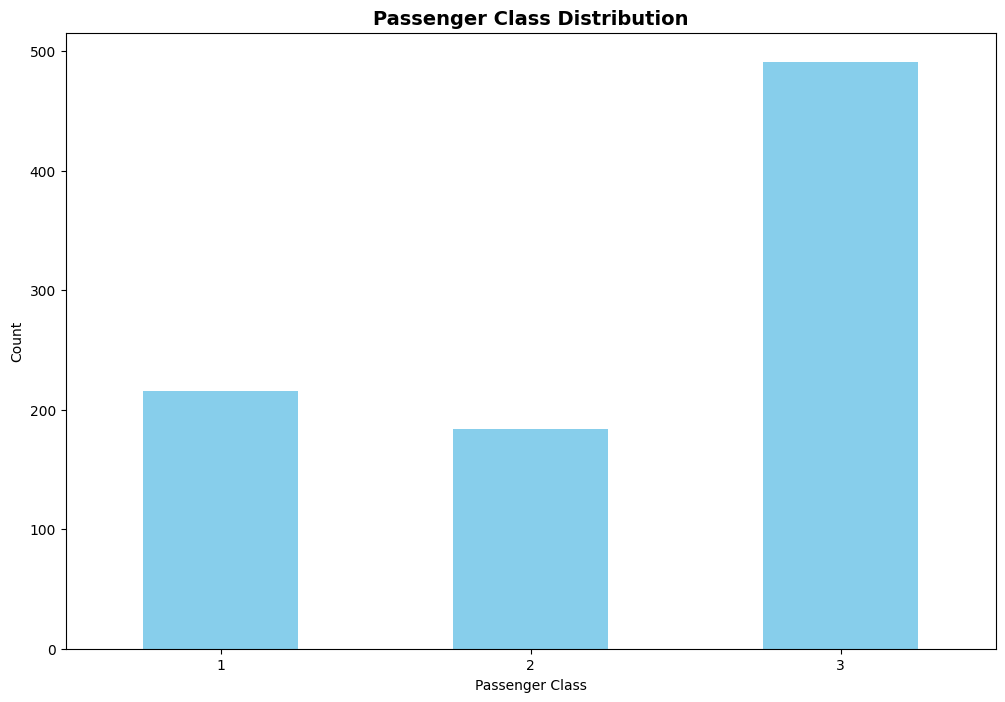

In [53]:
# Passenger Class Distribution
plt.subplot(1, 1, 1)
df['Pclass'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Passenger Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'male'), Text(1, 0, 'female')])

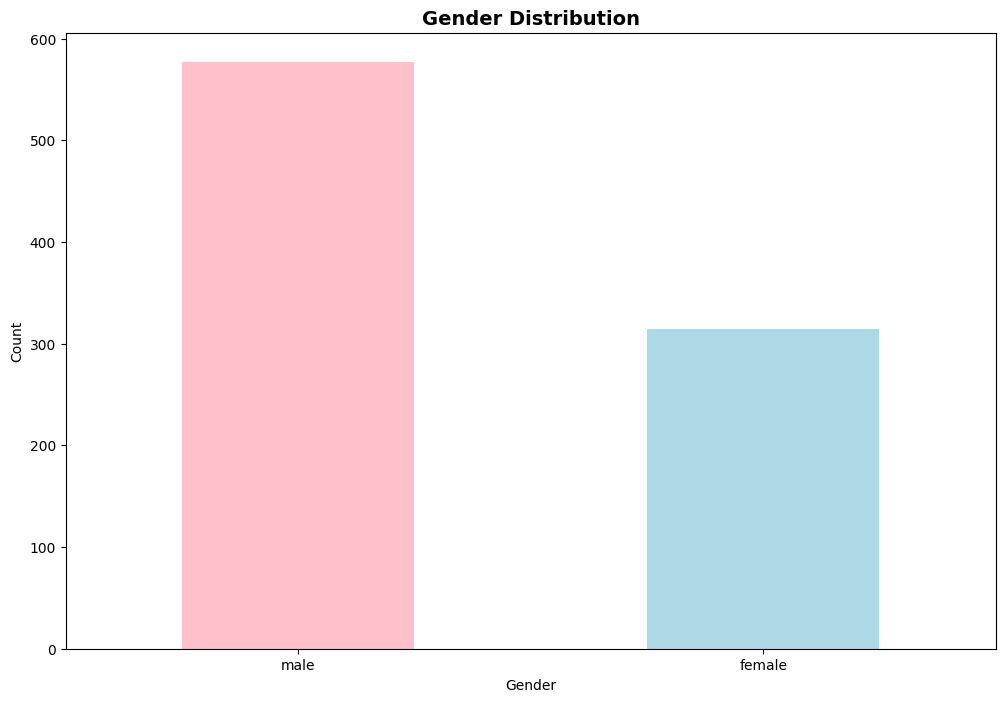

In [54]:
#Gender Distribution
plt.subplot(1, 1, 1)
df['Sex'].value_counts().plot(kind='bar', color=['pink', 'lightblue'])
plt.title('Gender Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

Text(0, 0.5, 'Frequency')

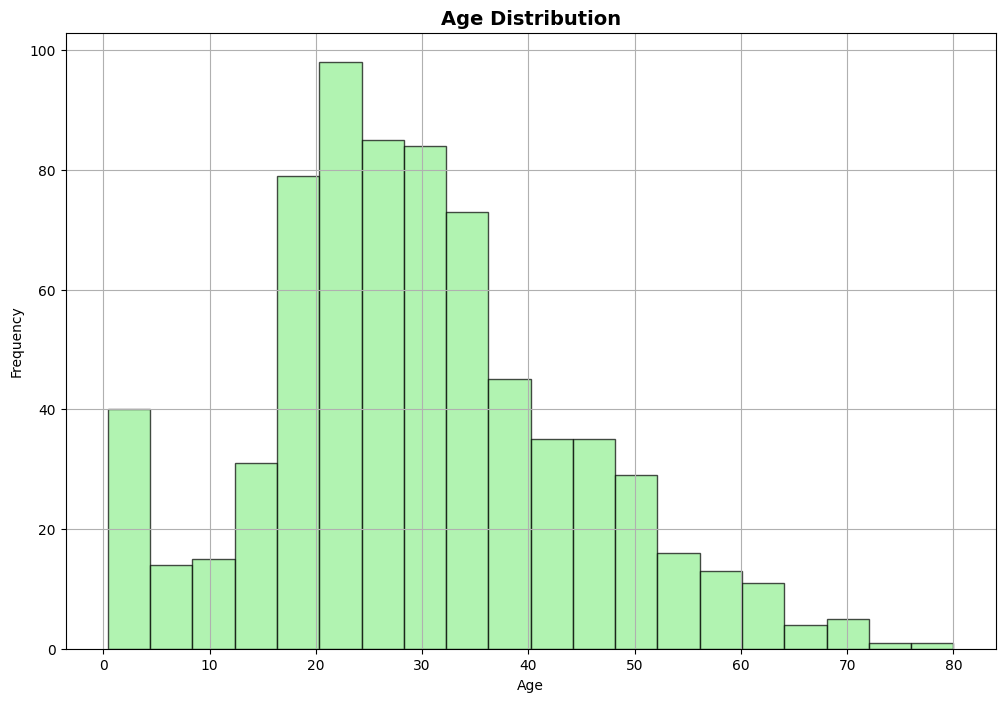

In [55]:
#Age Distribution
plt.subplot(1, 1, 1)
df['Age'].dropna().hist(bins=20, color='lightgreen', alpha=0.7, edgecolor='black')
plt.title('Age Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

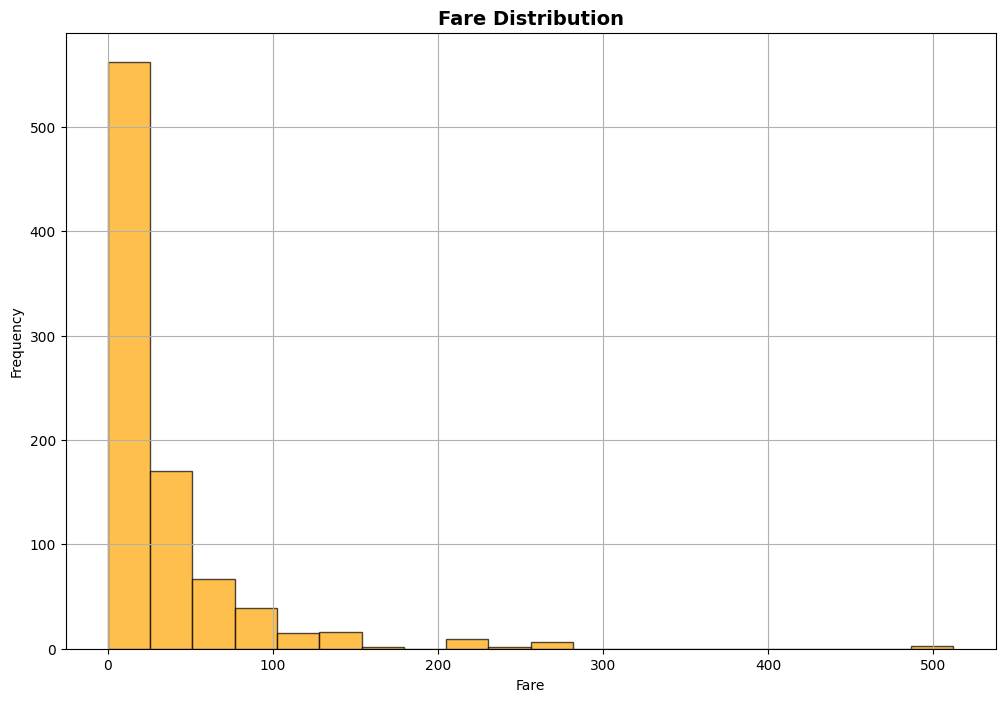

In [56]:
# Fare Distribution
plt.subplot(1, 1, 1)
df['Fare'].hist(bins=20, color='orange', alpha=0.7, edgecolor='black')
plt.title('Fare Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Fare')
plt.ylabel('Frequency')

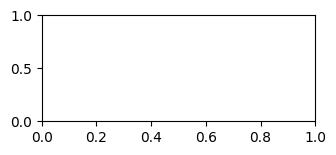

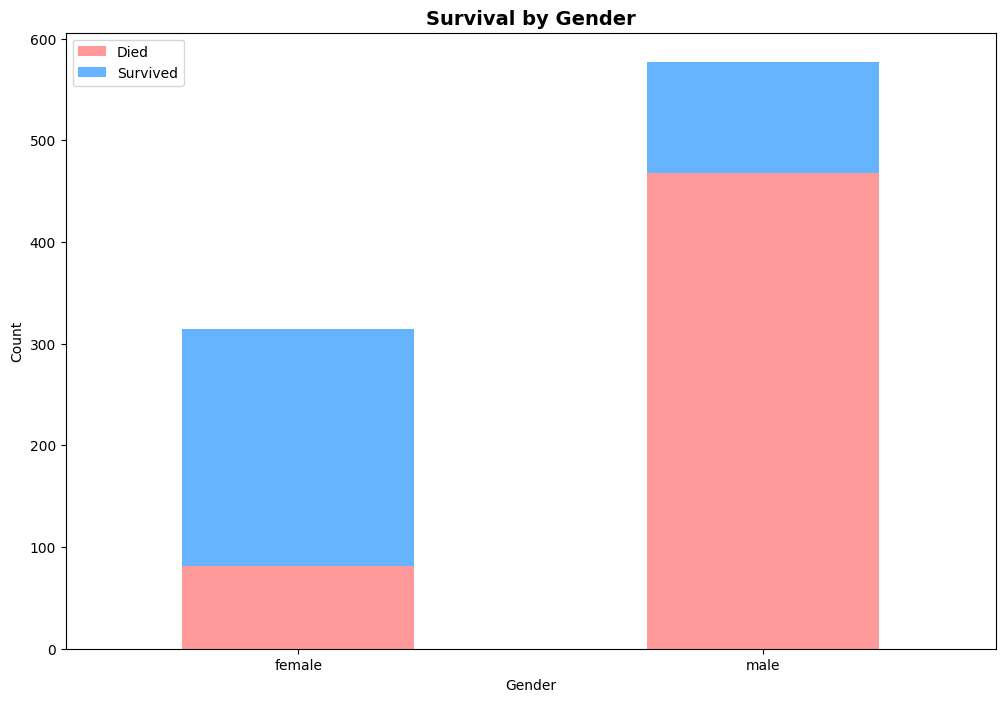

In [58]:
# Survival by Gender
plt.subplot(5, 3, 7)
survival_by_gender = pd.crosstab(df['Sex'], df['Survived'])
survival_by_gender.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'])
plt.title('Survival by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Died', 'Survived'])

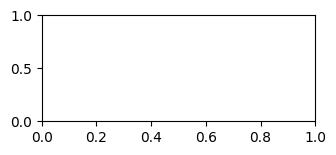

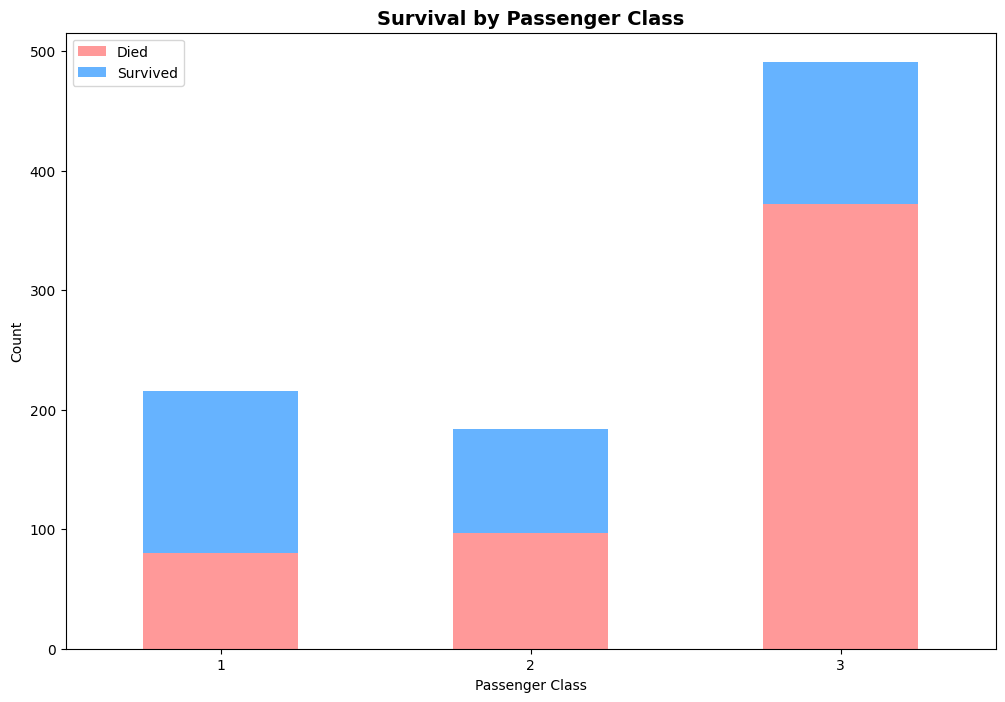

In [25]:
#Survival by Passenger Class
plt.subplot(5, 3, 8)
survival_by_class = pd.crosstab(df['Pclass'], df['Survived'])
survival_by_class.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'])
plt.title('Survival by Passenger Class', fontsize=14, fontweight='bold')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Died', 'Survived'])

Text(0, 0.5, 'Age')

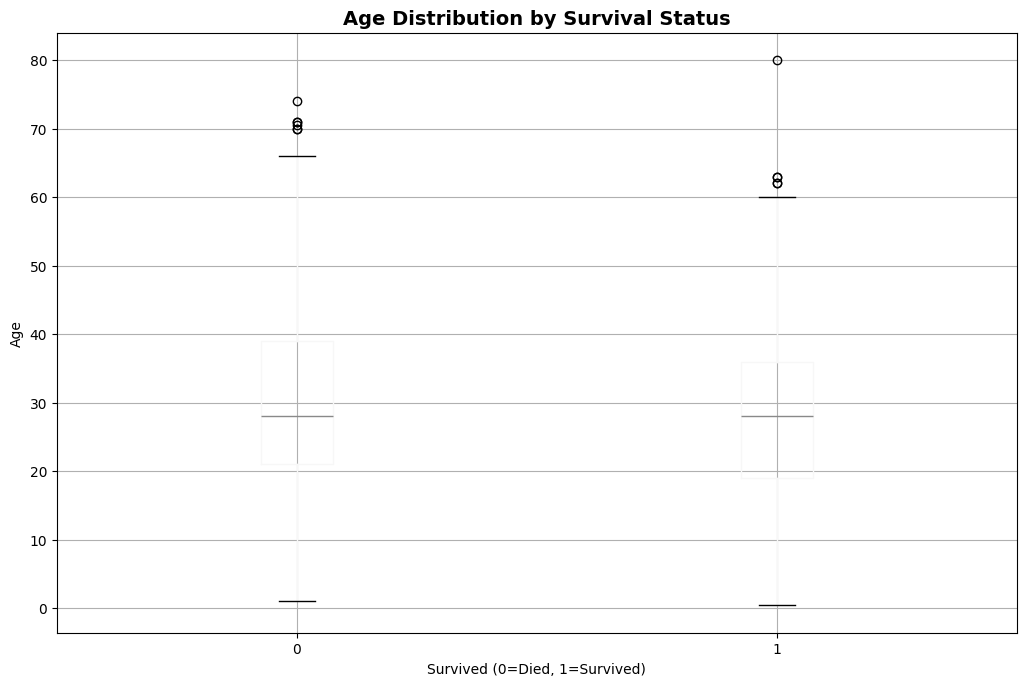

In [28]:
# Age Box Plot by Survival
plt.subplot(1, 1, 1)
df.boxplot(column='Age', by='Survived', ax=plt.gca())
plt.title('Age Distribution by Survival Status', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.xlabel('Survived (0=Died, 1=Survived)')
plt.ylabel('Age')

Text(0, 0.5, 'Fare')

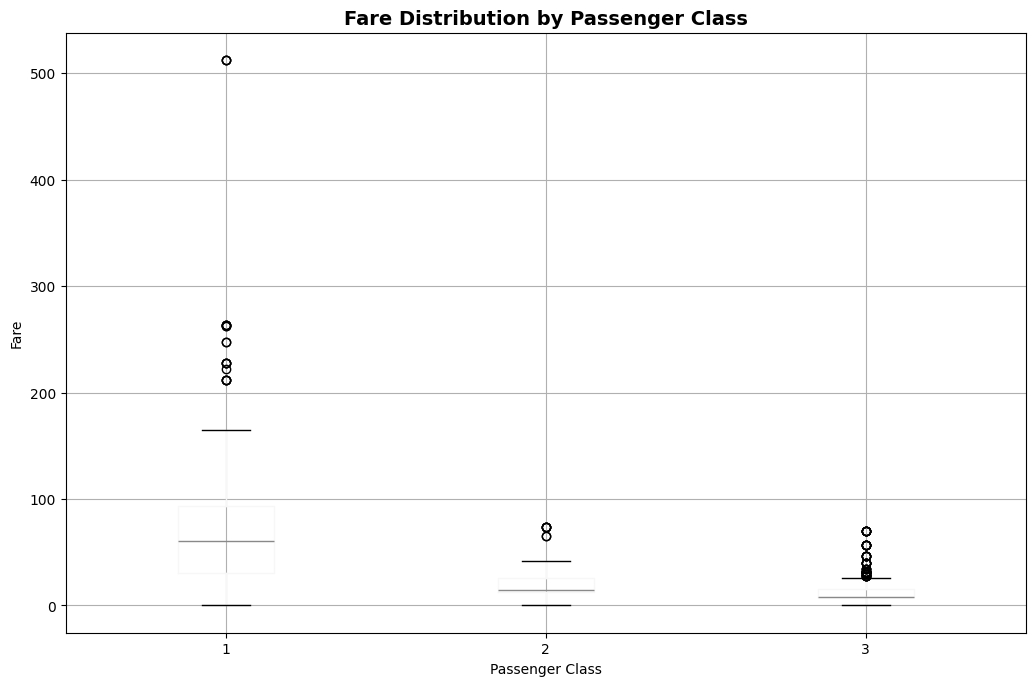

In [39]:
# Fare Box Plot by Passenger Class
plt.subplot(1, 1, 1)
df.boxplot(column='Fare', by='Pclass', ax=plt.gca())
plt.title('Fare Distribution by Passenger Class', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')

Text(0.5, 1.0, 'Embarkation Port Distribution')

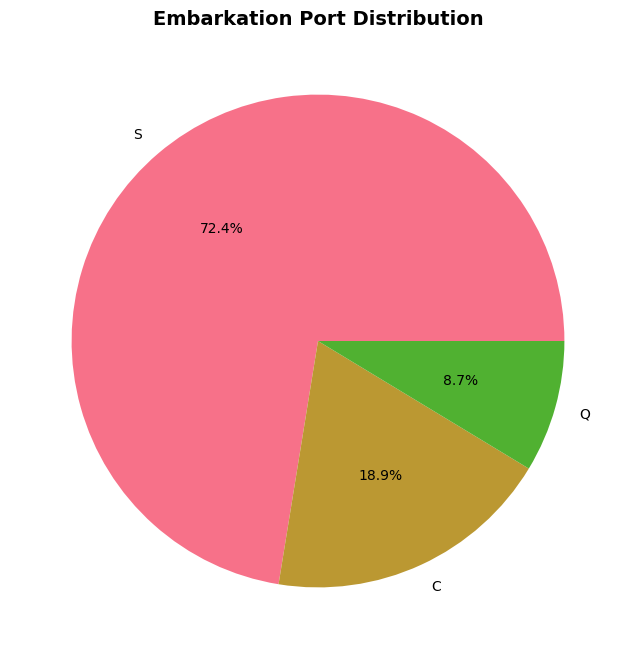

In [40]:
# Embarked Distribution
plt.subplot(1, 1, 1)
embarked_counts = df['Embarked'].value_counts()
plt.pie(embarked_counts.values, labels=embarked_counts.index, autopct='%1.1f%%')
plt.title('Embarkation Port Distribution', fontsize=14, fontweight='bold')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Child'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Young Adult'),
  Text(3, 0, 'Adult'),
  Text(4, 0, 'Senior')])

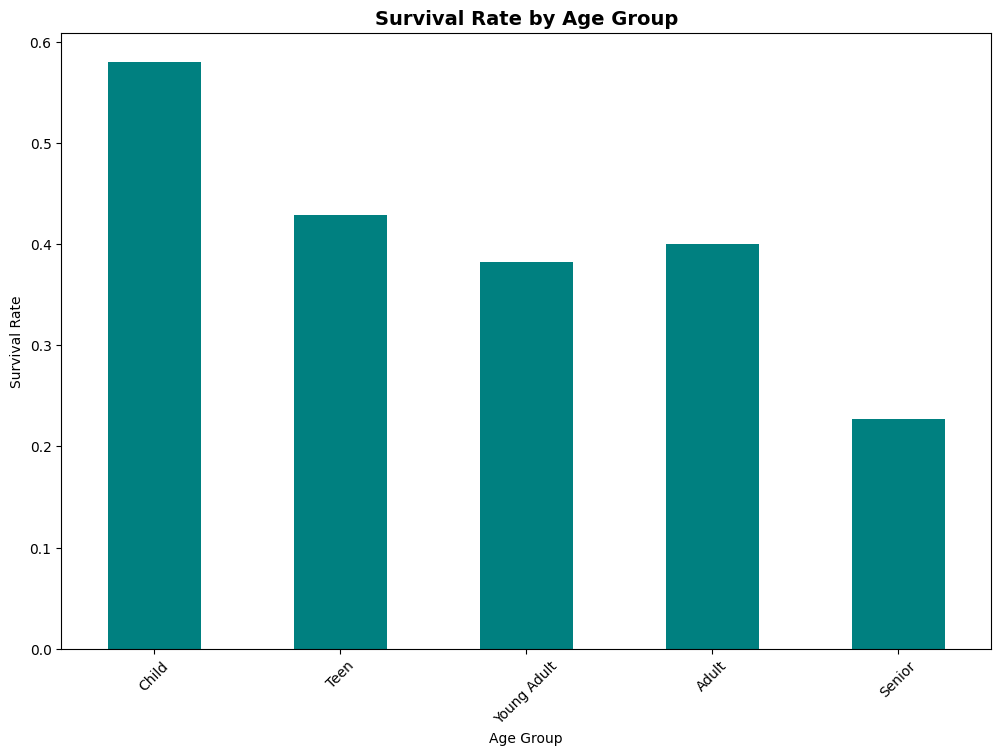

In [60]:
# Survival Rate by Age Groups
plt.subplot(1, 1, 1)
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100],
                        labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
age_survival = df.groupby('AgeGroup')['Survived'].mean()
age_survival.plot(kind='bar', color='teal')
plt.title('Survival Rate by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)

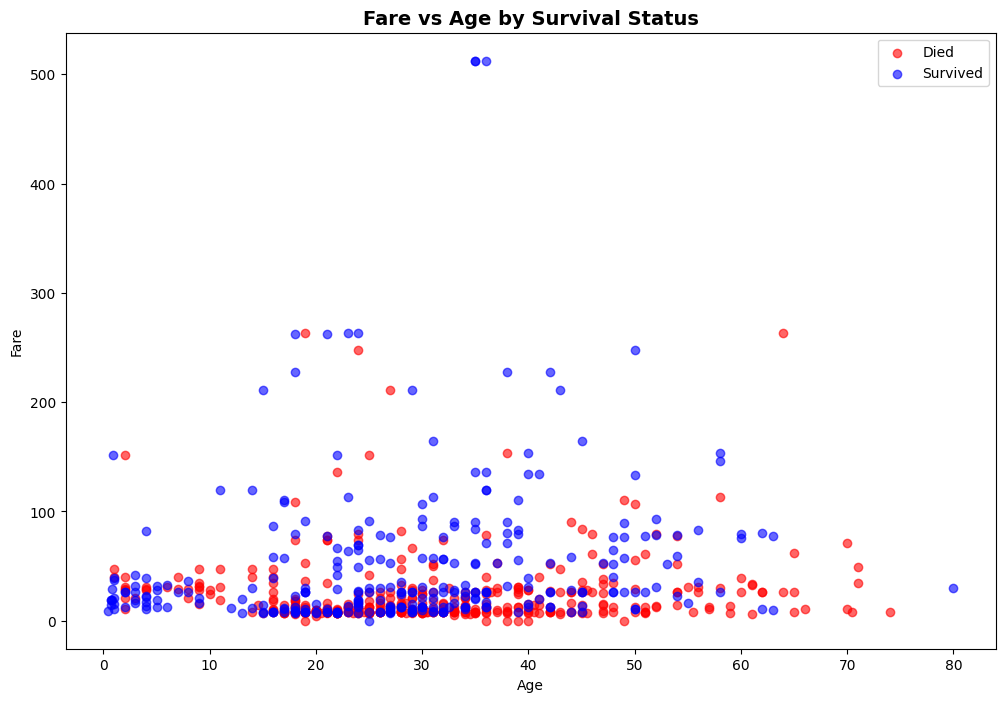

In [62]:
# Fare vs Age Scatter Plot
plt.subplot(1, 1, 1)
survivors = df[df['Survived'] == 1]
non_survivors = df[df['Survived'] == 0]
plt.scatter(non_survivors['Age'], non_survivors['Fare'], alpha=0.6, c='red', label='Died')
plt.scatter(survivors['Age'], survivors['Fare'], alpha=0.6, c='blue', label='Survived')
plt.title('Fare vs Age by Survival Status', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()

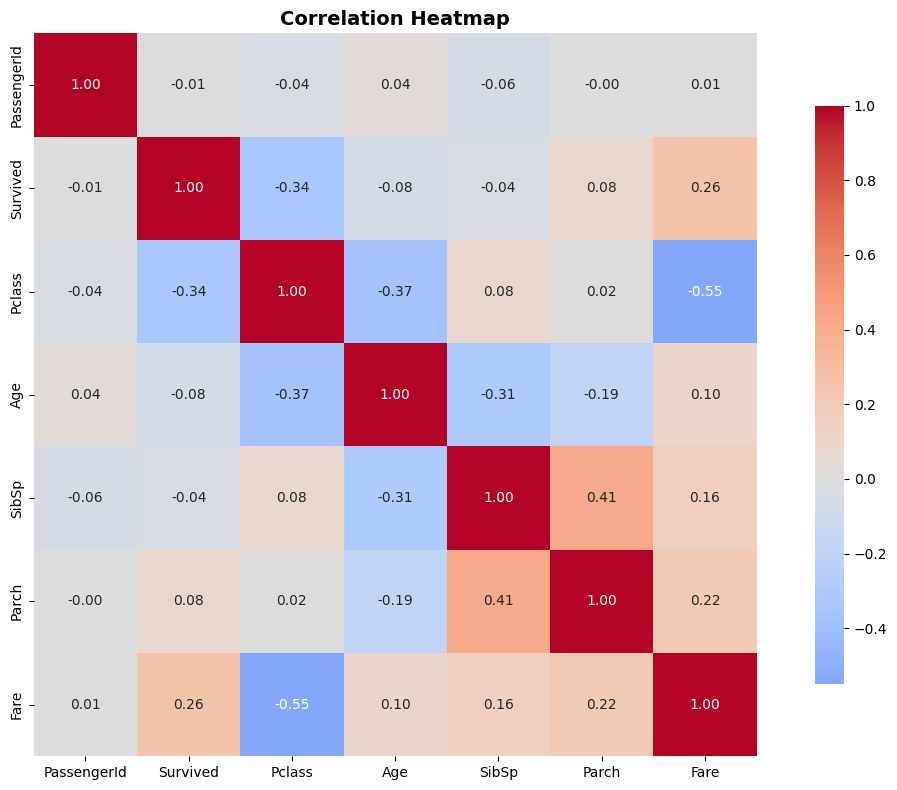

In [64]:
#Correlation Heatmap
plt.subplot(1, 1, 1)
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

**OUTLIER DETECTION**

In [65]:
def detect_outliers_iqr(df, column):
    """Detect outliers using IQR method"""
    if column not in df.columns or df[column].dtype not in ['int64', 'float64']:
        return pd.Series(dtype=bool)

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers

In [66]:
# Detect outliers for numerical columns
for col in numerical_cols:
    if col in df.columns:
        outliers = detect_outliers_iqr(df, col)
        outlier_count = outliers.sum()
        outlier_percentage = (outlier_count / len(df)) * 100
        print(f"{col}: {outlier_count} outliers ({outlier_percentage:.1f}%)")

        if outlier_count > 0:
            print(f"  Outlier values: {df[outliers][col].tolist()}")

PassengerId: 0 outliers (0.0%)
Survived: 0 outliers (0.0%)
Pclass: 0 outliers (0.0%)
Age: 11 outliers (1.2%)
  Outlier values: [66.0, 65.0, 71.0, 70.5, 65.0, 65.0, 71.0, 80.0, 70.0, 70.0, 74.0]
SibSp: 46 outliers (5.2%)
  Outlier values: [3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]
Parch: 213 outliers (23.9%)
  Outlier values: [1, 2, 1, 5, 1, 1, 5, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 4, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 3, 4, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 4, 1, 1, 2, 1, 2, 1, 1, 2, 5, 2, 1, 1, 1, 2, 1, 5, 2, 1, 1, 1, 2, 1, 6, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 2, 1, 2, 3, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 